# Doing your homework the easy way
The code we wrote for the homework involved 1) looping line by line through a file, 2) splitting each line up into parts, 3) checking to make sure that we weren't in a header line and that we were in the correct state-- basically a lot of stuff, that it seems like one might have to do over and over again when analyzing biological, or really any, data. 

Accordingly, there are good tools available to us when programming in python for dealing with these tasks. The one we will focus on will be `pandas` which is a free to use library of code that specializes in data analysis. 

Let's redo your homework then in using `pandas`. First we will download the up to date data

In [94]:
! rm daily.csv* && wget https://covidtracking.com/api/states/daily.csv .

--2020-04-06 15:55:06--  https://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 104.248.78.24
Connecting to covidtracking.com (covidtracking.com)|104.248.78.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222050 (217K) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>] 216.85K  1.26MB/s    in 0.2s    

2020-04-06 15:55:06 (1.26 MB/s) - ‘daily.csv’ saved [222050/222050]

--2020-04-06 15:55:06--  http://./
Resolving . (.)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘.’
FINISHED --2020-04-06 15:55:06--
Total wall clock time: 0.5s
Downloaded: 1 files, 217K in 0.2s (1.26 MB/s)


# Pandas
The `pandas` library provides an amazingly rich set of tools for data inport, export, cleaning, and more. We will use it here for bringing in and dealing with all the covid data from covidtracking.com

We start with import `pandas` and call it `pd` and also import the `matplotlib.pyplot` code as `plt`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## DataFrames
What makes pandas useful is that it provides an object called a DataFrame. DataFrames represent spreadsheet-like data for us by containing an ordered collection of columns, each of which can be of it's own data type. DataFrames have an index on rows and columns, and are loosely a dict of lists.

## read in data using pandas
checkout how easy it is to import the data from a `.csv` file it is using pandas

In [72]:
x = pd.read_csv("daily.csv")

these `pandas` objects are pretty smart, so when you ask then to do stuff like print, they know what's up. evaluate the cell below, first just returning `x` and then uncommenting `x.head()`. this is a super helfpful way to look at a new dataset that you have imported.

In [65]:
x
#x.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200405,AK,185.0,6099.0,NaN,NaN,20.0,NaN,NaN,NaN,...,20.0,6284,6284,6284,2,1.0,4.0,230.0,14.0,244.0
1,20200405,AL,1796.0,11282.0,NaN,NaN,231.0,NaN,NaN,NaN,...,231.0,13078,13078,13078,1,2.0,19.0,2009.0,216.0,2225.0
2,20200405,AR,830.0,10412.0,NaN,67.0,130.0,NaN,43.0,27.0,...,130.0,11242,11242,11242,5,2.0,130.0,785.0,87.0,872.0
3,20200405,AS,0.0,20.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200405,AZ,2269.0,25141.0,NaN,NaN,310.0,NaN,108.0,NaN,...,310.0,27410,27410,27410,4,12.0,13.0,0.0,250.0,250.0


`pandas` is also smart about date formats. Let's let `pandas` know that we are using a date in the date column. Then I'm going to set the names of the rows to the dates using the `set_index()` function. This will make my plot prettier in a minute

In [73]:
x['date']=pd.to_datetime(x['date'],format='%Y%m%d')
x.set_index(['date'],inplace=True)
x.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-04-05,AK,185.0,6099.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,20.0,6284,6284,6284,2,1.0,4.0,230.0,14.0,244.0
2020-04-05,AL,1796.0,11282.0,NaN,NaN,231.0,NaN,NaN,NaN,NaN,...,231.0,13078,13078,13078,1,2.0,19.0,2009.0,216.0,2225.0
2020-04-05,AR,830.0,10412.0,NaN,67.0,130.0,NaN,43.0,27.0,39.0,...,130.0,11242,11242,11242,5,2.0,130.0,785.0,87.0,872.0
2020-04-05,AS,0.0,20.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,60,0.0,0.0,0.0,0.0,0.0
2020-04-05,AZ,2269.0,25141.0,NaN,NaN,310.0,NaN,108.0,NaN,NaN,...,310.0,27410,27410,27410,4,12.0,13.0,0.0,250.0,250.0


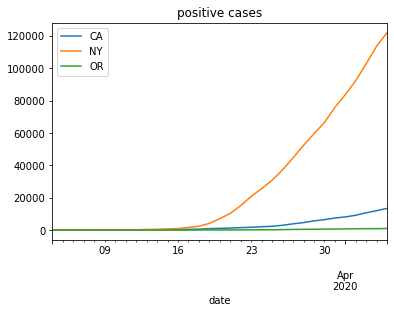

In [134]:
state1 = "CA"
state2 = "NY"
state3 = "OR"
ax = x[x['state'] == state1]['positive'].plot()
x[x['state'] == state2]['positive'].plot()
x[x['state'] == state3]['positive'].plot()
ax.set_title("positive cases")
ax.legend([state1,state2,state3])

### A quick note about plot and axes
note the line above where i said `ax = x[x['state'] == state1]['death'].plot()`. Here I'm
grabbing the output of `plot()` and saving it in a variable called `ax` which stands in my mind for Axes. [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) objects are the things that hold all the information about the aesthetics of a plot, like how x-tick marks are displayed, titles, legends, etc.. By way of example notice how lower down in the code cell I set the title and legend with the calls
```
ax.set_title("positive cases")
ax.legend([state1,state2,state3])
```

**Exercise:** Change the code block above to make a plot of the number of deaths in each population instead of the number of positive tests.

# Exponential growth
Epidemics, such as the Spanish flu in 1918 and COVID-19 right now, grow in number sensationally quickly. Indeed because humans in the population are immunologically naive, novel viruses can increase in number nearly free from hinderences, particularly at the early stages of an epidemic when infections are rare. 

<img src=imgs/E.coli-colony-growth.gif>

Imagine the following scenario-- imagine that each infected individual in a population infects two other uninfected individuals, and each of them goes on to infect two others, and so on. Imagine that this series of infections would happenly _discreetly_ in time, such that the number of infected individuals on day $t$, call it $N(t)$, starts on day 0 as $N(0) = 1$, and increases such that $N(1) = 2, N(2) = 4,$ etc.

With discrete time steps we call this sort of progression a geometric series where the number of infected individuals in the next time step $N(t+1)$

\begin{equation*}
N(t+1) = N(t)r 
\end{equation*}

where r is the growth rate per step. Let's plot such a series quickly

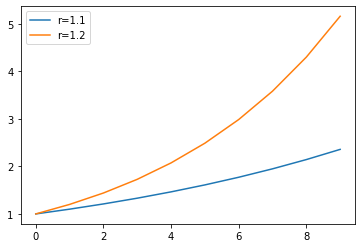

In [84]:
# geometric gowth function
# note i added a default number of timesteps
def geom_growth(init_size, r, timesteps=50):
    res = np.zeros(timesteps)
    res[0] = init_size
    for i in range(1,timesteps):
        res[i] = res[i-1] * r
    return res


plt.plot(geom_growth(1,1.1,10))
plt.plot(geom_growth(1,1.2,10))
plt.legend(labels=('r=1.1','r=1.2'))

so here we have two populations growing at different rates. the first thing to notice is how quickly these are growing. let's plot them for 200 days rather than 10

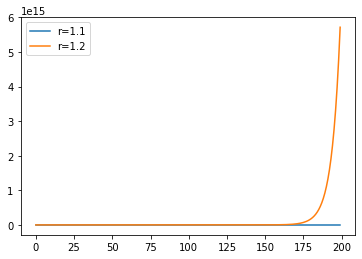

In [85]:
plt.plot(geom_growth(1, 1.1, 200))
plt.plot(geom_growth(1, 1.2, 200))
plt.legend(labels=('r=1.1', 'r=1.2'))

now you can barely see the smaller growth rate population, and the numbers of the blue population have gotten astromonical ($N \sim 10^{15}$)! These sorts of geometric growth processes quickly get out of hand.

## Continuous time
This will come as a shock to you but wild populations don't often have perfectly discrete generations. Instead there's distribution of times at which individuals might reproduce. So let's generalize our model above to one in which we don't need discrete time and instead allow time and use some calculus. 

As above we imagine that $N(t)$ describes the size of our population at time $t$ and that $r$ is the rate of increase in our population size (i.e. the difference between the instantaneous rate of births and the rate of deaths)

In continuous time we write down the differential equation which describes the rate of change of the population such that

\begin{equation*}
\frac{dN}{dt} = rN
\end{equation*}

We can integrate this directly to obtain 

\begin{equation}
N(t) = N(0)e^{rt}
\end{equation}

the last equation is the continuous time analogue of what we got above. Let's write  a quick function for it and plot

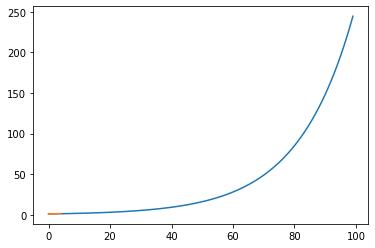

In [93]:
import numpy as np

def exp_growth(init_size, r, timesteps=50):
    x = np.linspace(0,timesteps,100)
    res = np.zeros(100)
    for i in range(0,len(res)):
        res[i] = init_size * np.exp(r*x[i])
    return res
plt.plot(exp_growth(1, 1.1, 5))
plt.plot(geom_growth(1, 1.1, 5))



so our new exponential growth model looks just like our discrete one. that's good because the new equation makes the math really easy!

For a mathematician, the natural thing to do with an exponential function is take it's logarithm. Let's take the log of both sides of the growth model above in equation 1


\begin{equation*}
\log N(t) = \log N(0) + rt
\end{equation*}

if $N(0) = 1$ then $\log 1 = 0$ and we can ignore the first term on the right hand side. then $\log N(t) = rt$ and taking the derivative of both sides with respect to time we obtain the provocative



\begin{equation*}
\frac{d\log N(t)}{dt} = r 
\end{equation*}



so this is saying that the slope of the log of the population size should be a constant and that slope should be the growth rate itself! 

Math is cool.

### Estimate the growth rate from exponential data
Let's try to estimate the growth rate, $r$, by fitting a line to the numbers spit out from out `exp_growth()` function. We might pretend that these data are real data, say from a pandemic

slope estimate 1.0999999999999999 vs true 1.1)


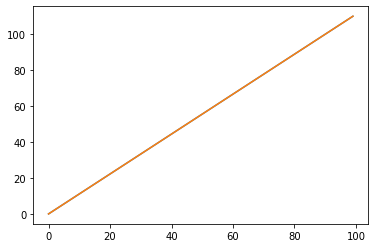

In [61]:
ln = np.log(exp_growth(1, 1.1,100)) #get growth trajectory, take log
x = np.linspace(0,len(ln),len(ln)) # make array for X dimension
slope, intercept = np.polyfit(x,ln,1) #fit a line, y = ax+b
y = (slope * x) + intercept #back calculate y
print(f"slope estimate {slope} vs true 1.1)")
plt.plot(ln)
plt.plot(y)

so that looks perfect! we are able to recover the parameter of interest by fitting a line using `np.polyfit()` to data and estimating the slope. Let's do this on real data next.

# Estimate doubling time of COVID-19 case number from data
Let's work on the covidtracking.com data that we brought in earlier. We will restrict ourselves to one state at a time

Text(0.5, 1.0, 'exp growth rate for NY: 0.29995813933217796\n estimated doubling time for NY: 2.300320976574281')

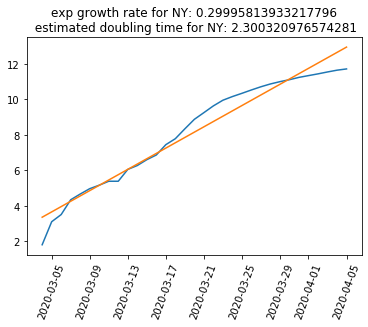

In [131]:
state = 'NY'
ca_log = np.log(x[x['state'] == state]['positive']) # log tranform counts
day = np.linspace(len(ca_log),1,len(ca_log)) # make array of day numbers
slope, intercept = np.polyfit(day,ca_log,1) # fit log(cases) ~ ax+b
y = (slope * day) + intercept # get best fit line from estimates above
plt.plot(ca_log.index,ca_log) # plot log(cases)
plt.plot(ca_log.index,y) # plot best fit line
plt.xticks(rotation=70) # adjust tick marks on x-axis to look nice
plt.title(f"exp growth rate for {state}: {slope}\n estimated doubling time for {state}: {0.69/slope}")

**Exercise:** change the code block above to look at individual states. What is the estimated doubling time in California? In Oregon?


## Is the curve flattening?
Looking at the figure above it really looks like the slope in the number of cases over time is decreasing towards the present. This is good news, and means that social distancing is working to decrease the rate of transmission of COVID-19. Let's try to quantify this effect. To do that I will split the dataset into a more recent set of observations and an older one. I'm choosing 2020-03-30 as an arbitrary choice. In your homework you will play with this.

Note the super convenient index below that works with dates

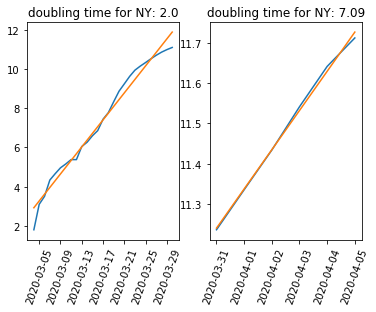

In [135]:
older = x['2020-03-30':]
recent = x[:'2020-03-30']
state = 'NY'
data = [older, recent]
fig, ax = plt.subplots(nrows=1, ncols=2)
i = 0
for z in data:
    ca_log = np.log(z[z['state'] == state]['positive']) # log tranform counts
    day = np.linspace(len(ca_log),1,len(ca_log)) # make array of day numbers
    slope, intercept = np.polyfit(day,ca_log,1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(ca_log.index,ca_log) # plot log(cases)
    ax[i].plot(ca_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    ax[i].set_title(f"doubling time for {state}: {round(0.69/slope, 2)}")
    i+=1